In [5]:
#Setup and Configuration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pathlib import Path
import warnings


#configuration
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-v0_8')

#constants 
DATA_PATH = Path("dataset/train.csv")
VIZ_PATH = Path("visualizations")
VIZ_PATH.mkdir(exist_ok=True)

COLORS = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']

In [16]:
#Utility Functions

def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        print(f"Data loaded: {data.shape}")
        return data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

df = load_data(DATA_PATH)


def get_missing_summary(df):
    missing_data = []
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            missing_data.append({
                'feature' : col,
                'missing_count' : df[col].isnull().sum(),
                'missing_pct' : round(df[col].isnull().mean() * 100, 2)
            })
    
    if missing_data:
        return pd.DataFrame(missing_data).sort_values('missing_pct', ascending=False)
    return pd.DataFrame()

missing_summary = get_missing_summary(df)

features = missing_summary['feature'].tolist()

def plot_missing_impact(df, features, target='SalePrice' , max_features = 6):
    features_to_plot = features[:max_features]

    fig,axes = plt.subplots(2,3, figsize=(15,16))
    fig.suptitle('Missing Values Impact on Sale Price', fontsize=14)
    axes = axes.ravel()

    for i,feature in enumerate(features_to_plot):
        data = df.copy()
        data['is_missing'] = data[feature].isnull().astype(int)

        median_prices = data.groupby('is_missing')[target].sum()

        axes[i].bar(['Present', 'Missing'],
                   [median_prices[0], median_prices[1]],
                   color = COLORS[:2])
        axes[i].set_title(feature)
        axes[i].set_ylabel('Median Price')

    for j, v in enumerate([median_prices[0], median_prices[1]]):
        axes[i].text(j, v, f'${v:,.0f}', ha='center', va='bottom')

    for i in range(len(features_to_plot), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.savefig(VIZ_PATH / 'missing_impact.png', dpi=300, bbox_inches='tight')
    plt.show()


Data loaded: (1460, 81)


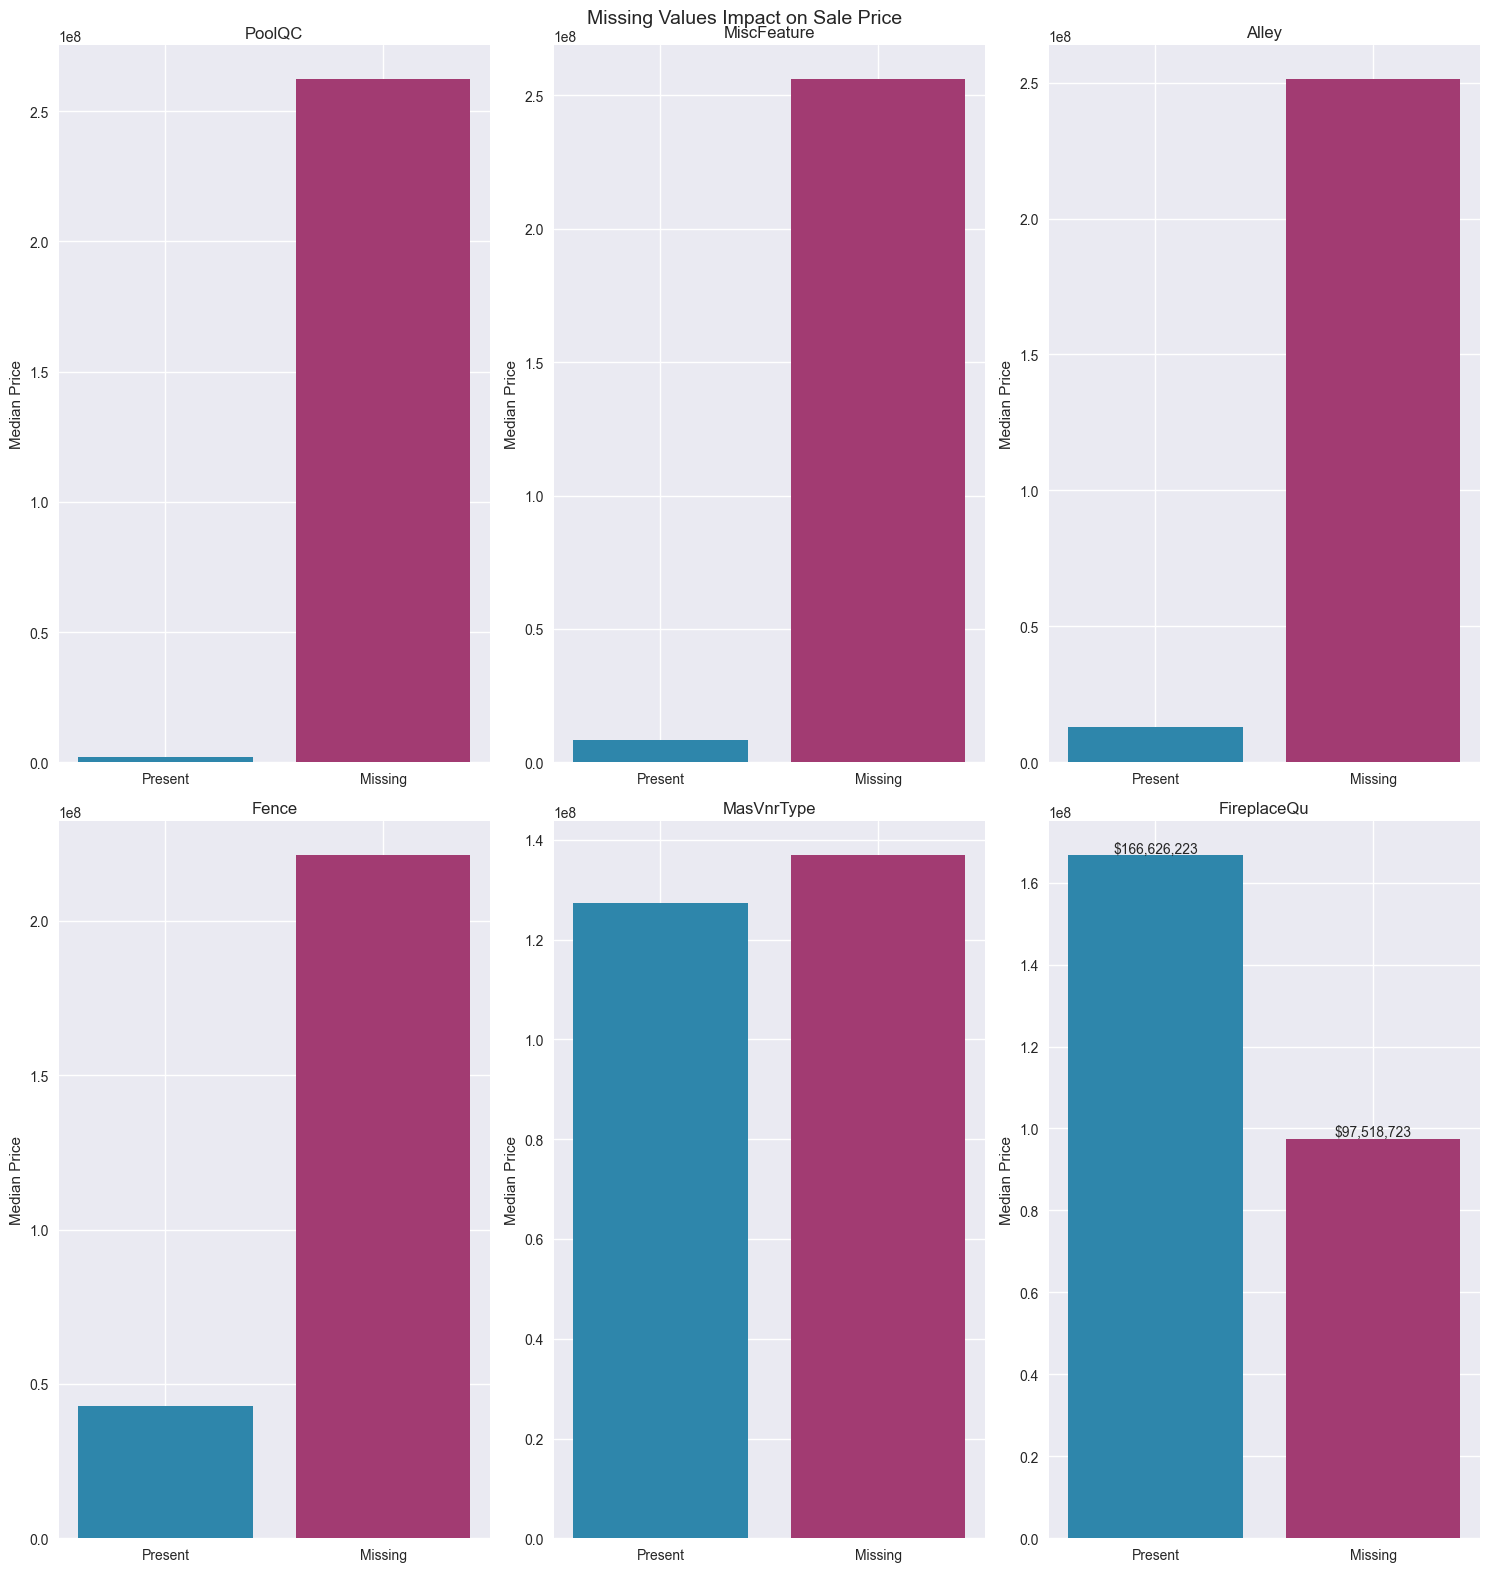

In [17]:
plot_missing_impact(df, features, target='SalePrice' , max_features = 6)